Dataset Shape:  (20631, 26)
Columns:  Index(['unit', 'cycle', 'op1', 'op2', 'op3', 's1', 's2', 's3', 's4', 's5',
       's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16',
       's17', 's18', 's19', 's20', 's21'],
      dtype='object')
Head of the Dataset:
   unit  cycle     op1     op2    op3      s1      s2       s3       s4  \
0     1      1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60   
1     1      2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14   
2     1      3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20   
3     1      4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87   
4     1      5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22   

      s5  ...     s12      s13      s14     s15   s16  s17   s18    s19  \
0  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388  100.0   
1  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388  100.0   
2  14.62  ...  522.42  2388.03  8133.23  8.41

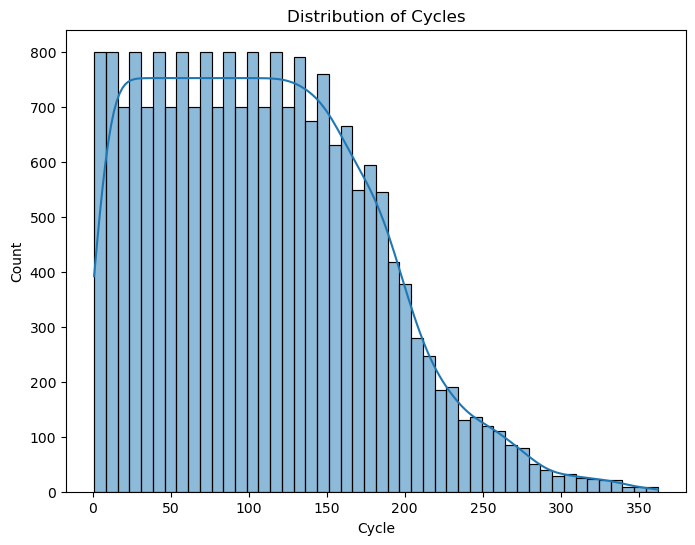

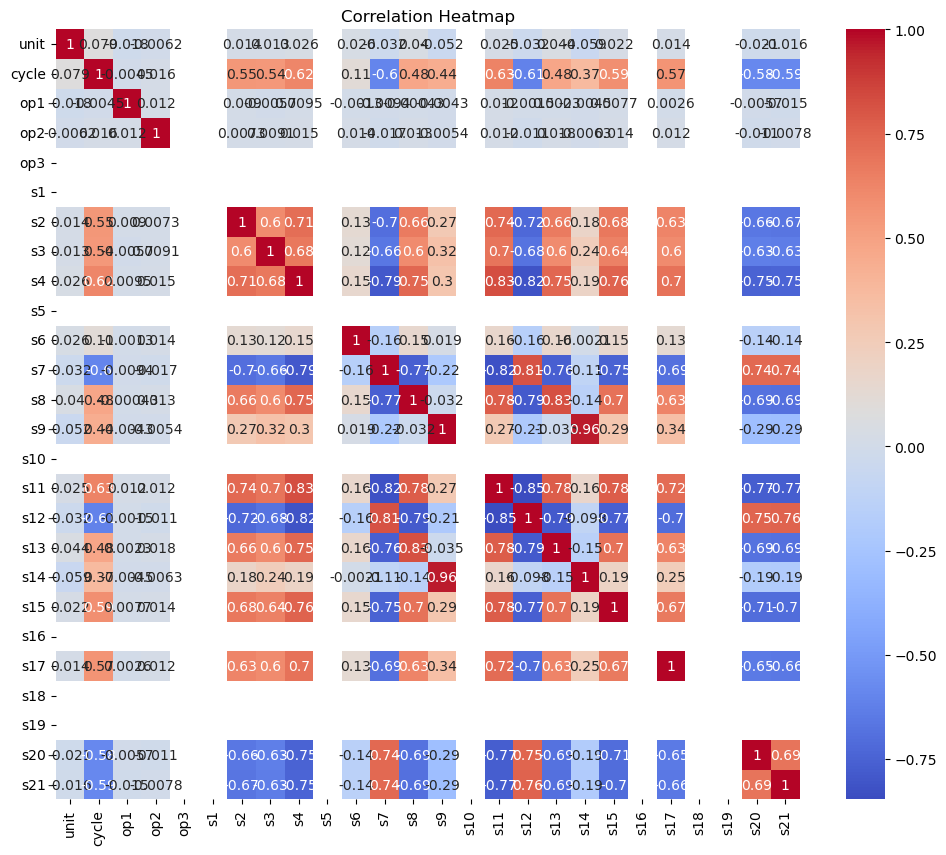

Epoch 1/50
516/516 [==============================] - 2s 2ms/step - loss: 0.3022 - accuracy: 0.8709 - val_loss: 0.1921 - val_accuracy: 0.9326
Epoch 2/50
516/516 [==============================] - 1s 2ms/step - loss: 0.1726 - accuracy: 0.9284 - val_loss: 0.1284 - val_accuracy: 0.9639
Epoch 3/50
516/516 [==============================] - 1s 2ms/step - loss: 0.1270 - accuracy: 0.9496 - val_loss: 0.0964 - val_accuracy: 0.9767
Epoch 4/50
516/516 [==============================] - 1s 2ms/step - loss: 0.1001 - accuracy: 0.9601 - val_loss: 0.0770 - val_accuracy: 0.9833
Epoch 5/50
516/516 [==============================] - 1s 2ms/step - loss: 0.0825 - accuracy: 0.9685 - val_loss: 0.0648 - val_accuracy: 0.9843
Epoch 6/50
516/516 [==============================] - 1s 2ms/step - loss: 0.0699 - accuracy: 0.9739 - val_loss: 0.0549 - val_accuracy: 0.9886
Epoch 7/50
516/516 [==============================] - 1s 2ms/step - loss: 0.0629 - accuracy: 0.9772 - val_loss: 0.0491 - val_accuracy: 0.9891
Epoch 

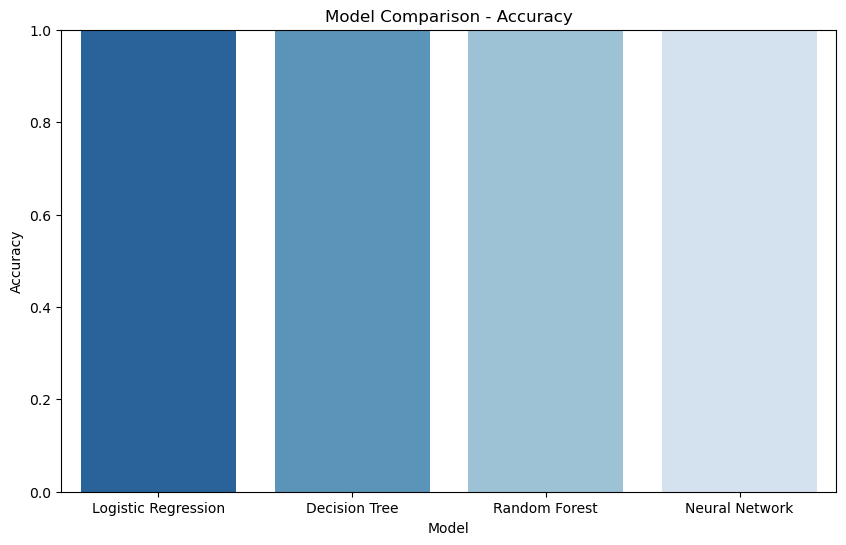

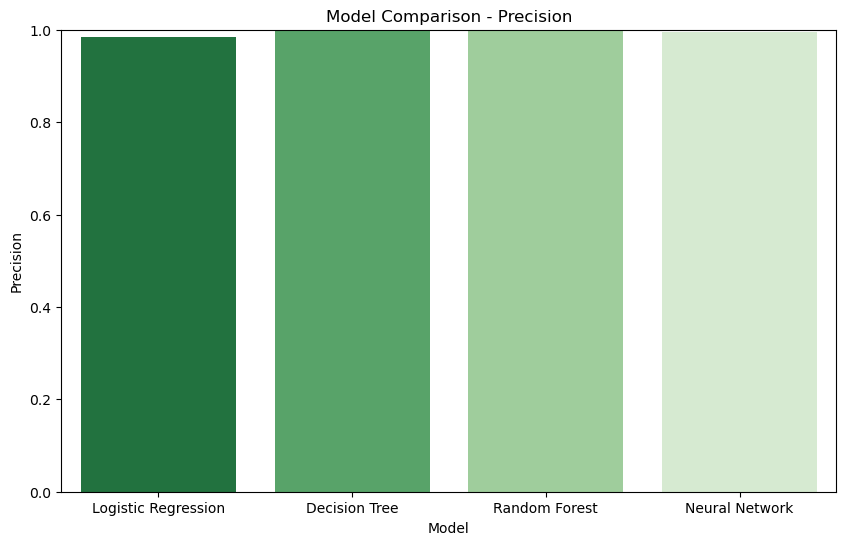

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Load the dataset
df = pd.read_table('C:\\Users\\Dovid Glassner\\Downloads\\CMaps\\train_FD001.txt', sep='\s+', header=None)

# Check if columns 26 and 27 exist in the DataFrame
if 26 in df.columns and 27 in df.columns:
    df.drop([26, 27], axis=1, inplace=True)  # Remove unused columns

df.columns = ['unit', 'cycle', 'op1', 'op2', 'op3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8',
              's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']

# Data Exploration
print("Dataset Shape: ", df.shape)
print("Columns: ", df.columns)
print("Head of the Dataset:")
print(df.head())

# Descriptive Statistics
print("Descriptive Statistics:")
print(df.describe())

# Check for Missing Values
print("Missing Values:")
print(df.isnull().sum())

# Visualize the distribution of 'cycle' variable
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='cycle', kde=True)
plt.xlabel('Cycle')
plt.ylabel('Count')
plt.title('Distribution of Cycles')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering
n_units = df['unit'].nunique()
df['remaining_cycles'] = df.groupby('unit')['cycle'].transform(lambda x: n_units - x)
df['rul'] = df.groupby('unit')['remaining_cycles'].rank(ascending=False)

# Create the target variable
df['failed'] = np.where(df['rul'] <= 30, 1, 0)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['unit', 'cycle', 'failed', 'rul'], axis=1),
                                                    df['failed'], test_size=0.2, random_state=42)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)

# Train decision tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)

# Train random forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)

# Train neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))
y_pred_nn = np.where(model.predict(X_test_scaled) > 0.5, 1, 0)
nn_accuracy = accuracy_score(y_test, y_pred_nn)
nn_precision = precision_score(y_test, y_pred_nn)

# Model Comparison
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Neural Network']
accuracy_scores = [lr_accuracy, dt_accuracy, rf_accuracy, nn_accuracy]
precision_scores = [lr_precision, dt_precision, rf_precision, nn_precision]

# Visualize Model Comparison - Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracy_scores, palette='Blues_r')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.ylim([0, 1])
plt.show()

# Visualize Model Comparison - Precision
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=precision_scores, palette='Greens_r')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Model Comparison - Precision')
plt.ylim([0, 1])
plt.show()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [3]:
# Load the dataset
df = pd.read_table('C:\\Users\\Dovid Glassner\\Downloads\\CMaps\\train_FD001.txt', sep='\s+', header=None)

# Check if columns 26 and 27 exist in the DataFrame
if 26 in df.columns and 27 in df.columns:
    df.drop([26, 27], axis=1, inplace=True)  # Remove unused columns

df.columns = ['unit', 'cycle', 'op1', 'op2', 'op3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8',
              's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']

In [4]:
# Data Exploration
print("Dataset Shape: ", df.shape)
print("Columns: ", df.columns)
print("Head of the Dataset:")
print(df.head())

Dataset Shape:  (20631, 26)
Columns:  Index(['unit', 'cycle', 'op1', 'op2', 'op3', 's1', 's2', 's3', 's4', 's5',
       's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16',
       's17', 's18', 's19', 's20', 's21'],
      dtype='object')
Head of the Dataset:
   unit  cycle     op1     op2    op3      s1      s2       s3       s4  \
0     1      1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60   
1     1      2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14   
2     1      3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20   
3     1      4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87   
4     1      5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22   

      s5  ...     s12      s13      s14     s15   s16  s17   s18    s19  \
0  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388  100.0   
1  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388  100.0   
2  14.62  ...  522.42  2388.03  8133.23  8.41

In [5]:
# Descriptive Statistics
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
               unit         cycle           op1           op2      op3  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.0   
mean      51.506568    108.807862     -0.000009      0.000002    100.0   
std       29.227633     68.880990      0.002187      0.000293      0.0   
min        1.000000      1.000000     -0.008700     -0.000600    100.0   
25%       26.000000     52.000000     -0.001500     -0.000200    100.0   
50%       52.000000    104.000000      0.000000      0.000000    100.0   
75%       77.000000    156.000000      0.001500      0.000300    100.0   
max      100.000000    362.000000      0.008700      0.000600    100.0   

                 s1            s2            s3            s4            s5  \
count  2.063100e+04  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean   5.186700e+02    642.680934   1590.523119   1408.933782  1.462000e+01   
std    6.537152e-11      0.500053      6.131150      9.000605  3.394700e

In [6]:
# Check for Missing Values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
unit     0
cycle    0
op1      0
op2      0
op3      0
s1       0
s2       0
s3       0
s4       0
s5       0
s6       0
s7       0
s8       0
s9       0
s10      0
s11      0
s12      0
s13      0
s14      0
s15      0
s16      0
s17      0
s18      0
s19      0
s20      0
s21      0
dtype: int64


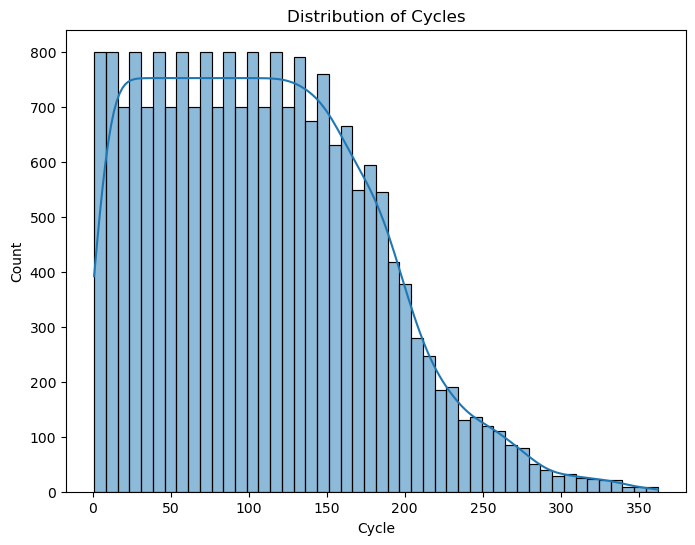

In [7]:
# Visualize the distribution of 'cycle' variable
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='cycle', kde=True)
plt.xlabel('Cycle')
plt.ylabel('Count')
plt.title('Distribution of Cycles')
plt.show()

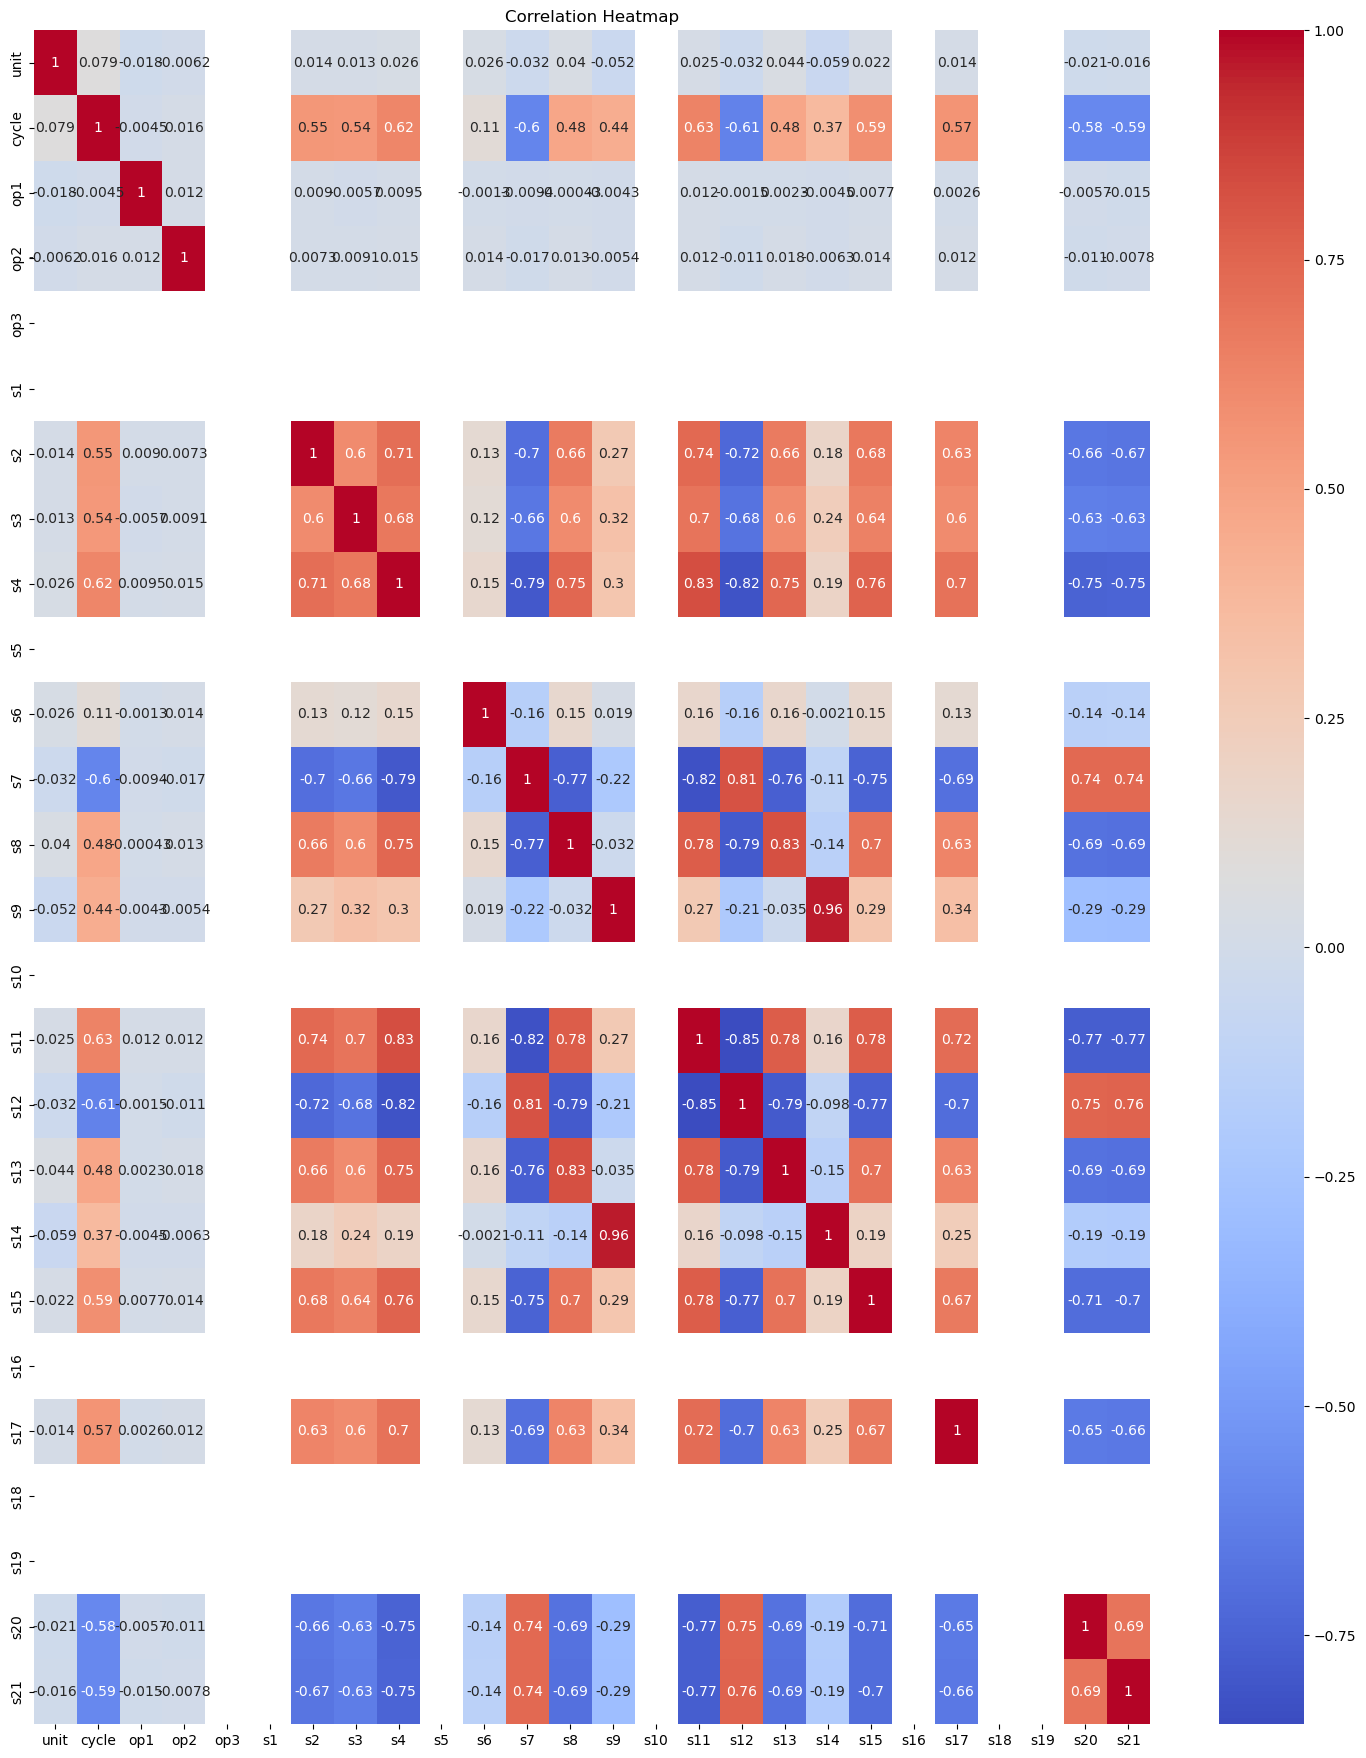

In [8]:
# Correlation Heatmap
plt.figure(figsize=(18, 22))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

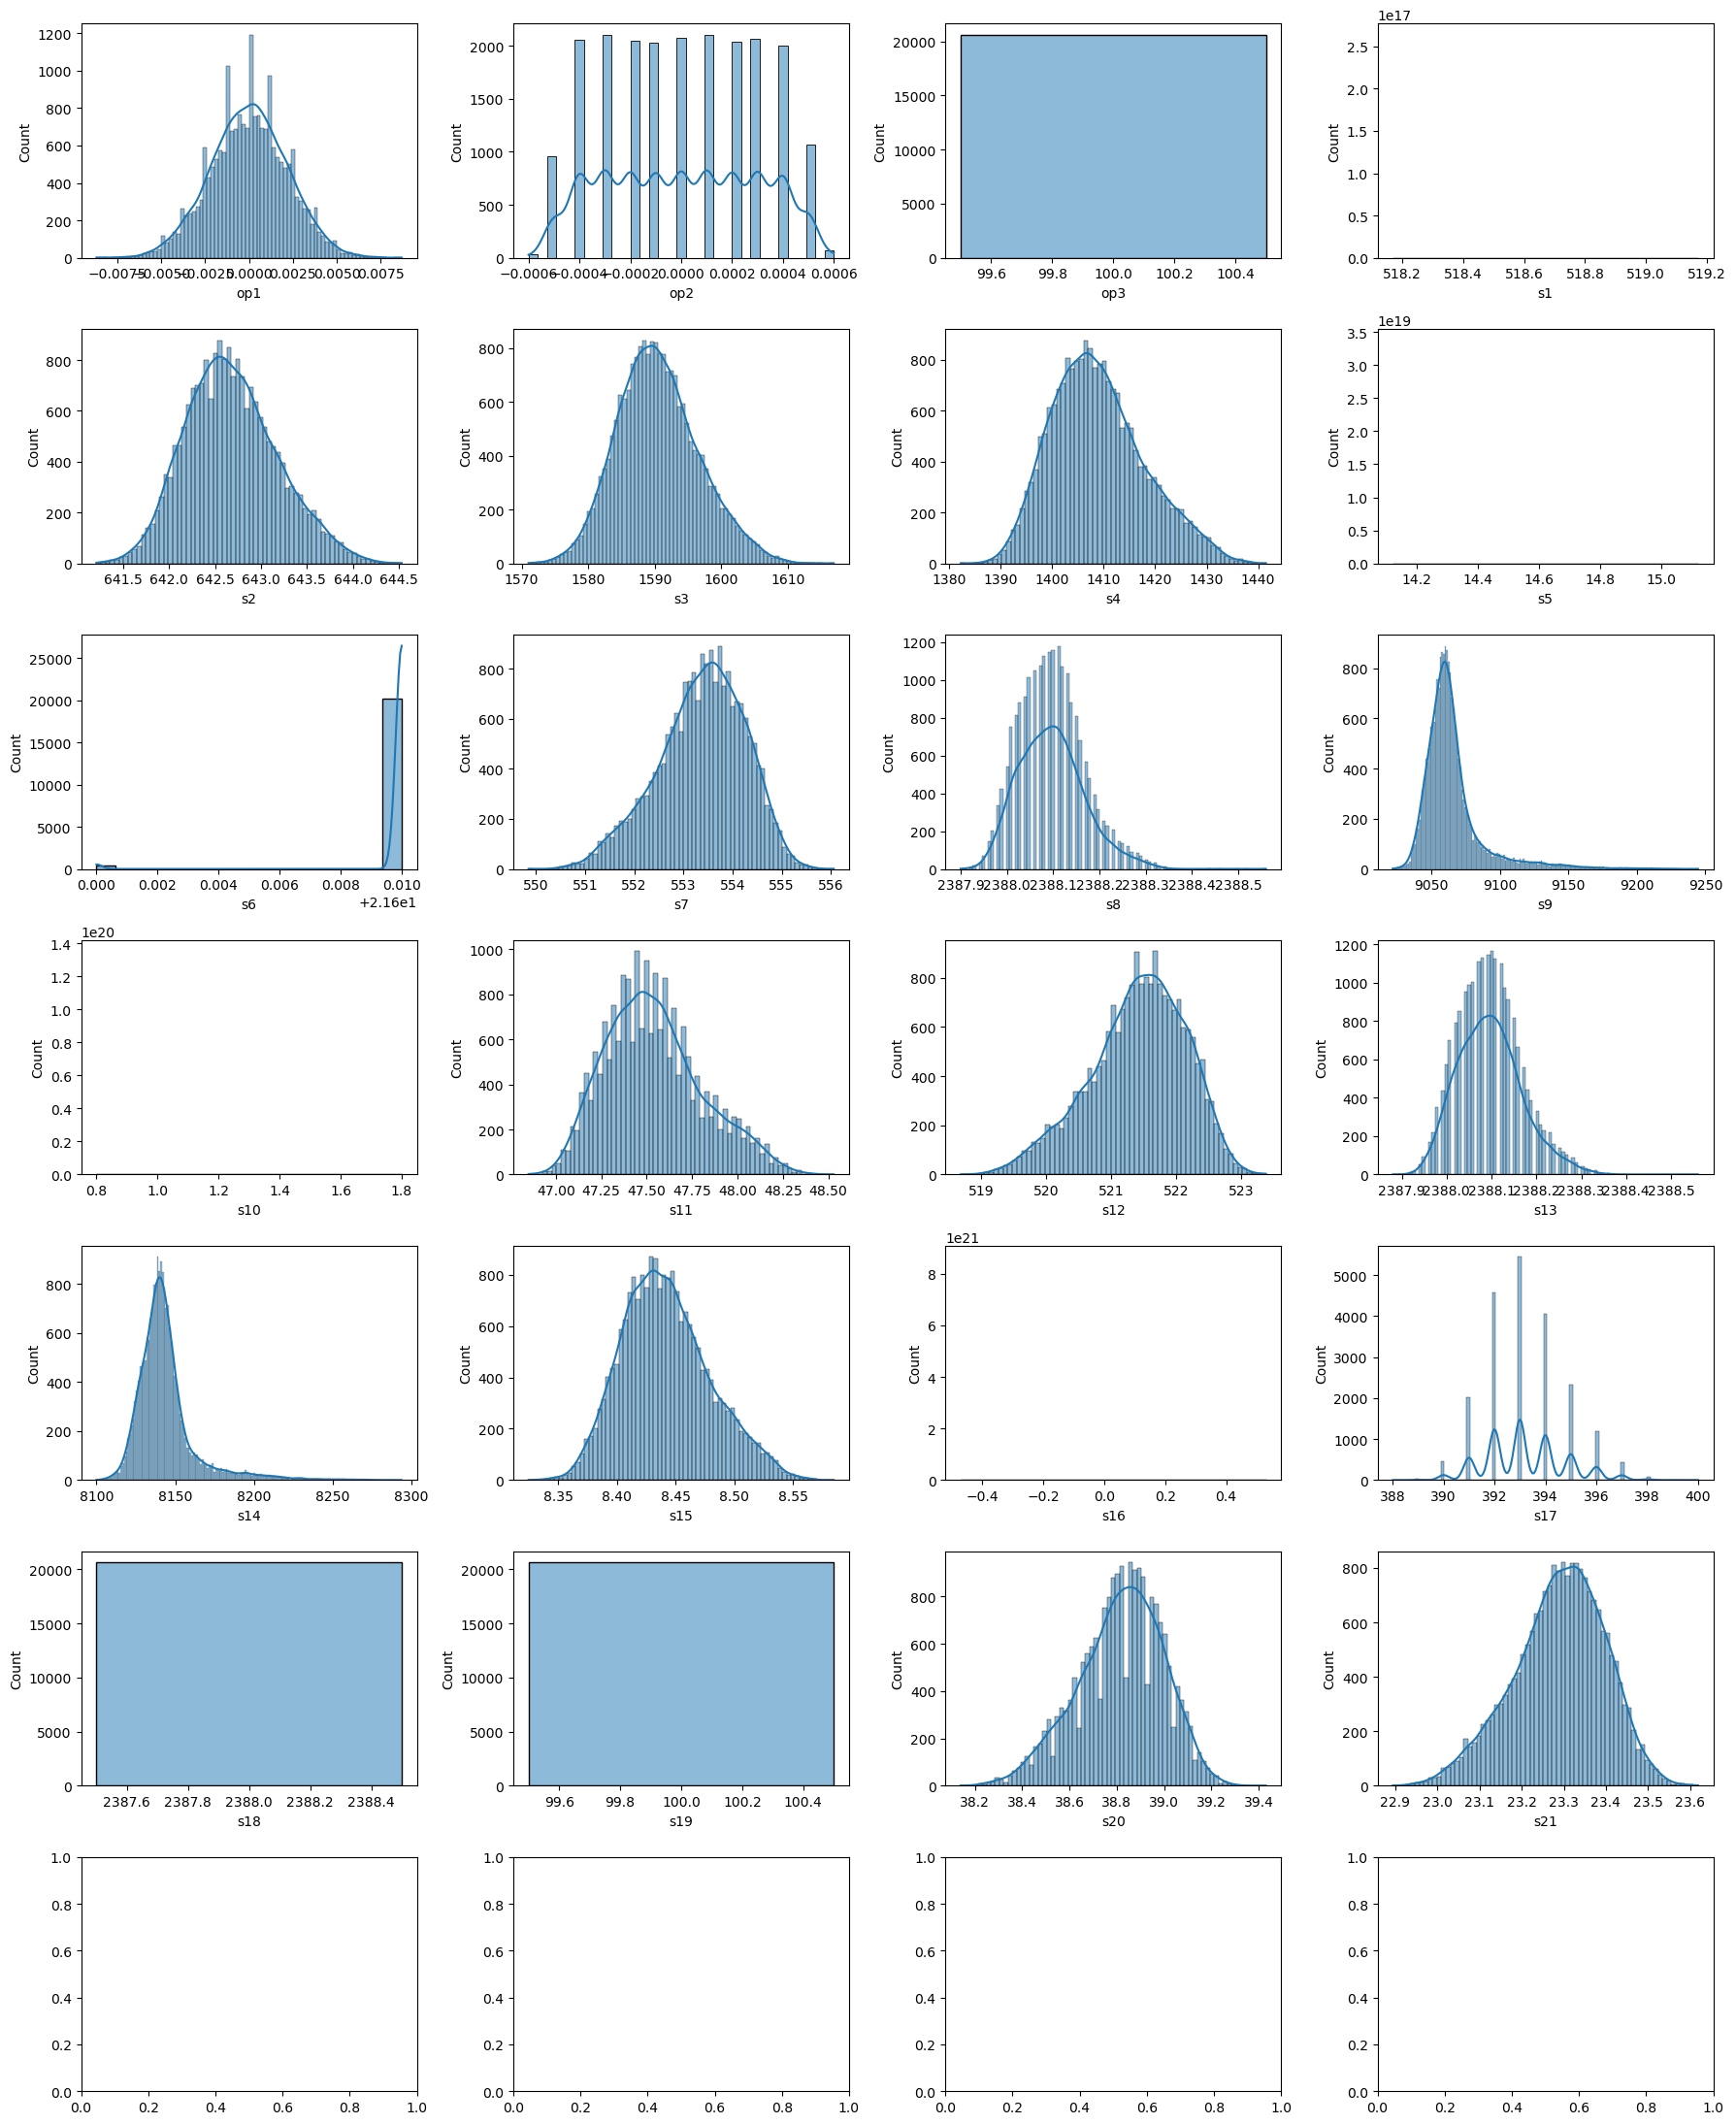

In [9]:
# Feature Distribution
fig, axes = plt.subplots(7, 4, figsize=(18, 22))
axes = axes.flatten()
for i, col in enumerate(df.columns[2:]):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()


In [10]:
# Create the target variable
df['max_cycle'] = df.groupby('unit')['cycle'].transform('max')
df['failed'] = np.where(df['max_cycle'] - df['cycle'] <= 30, 1, 0)
df.drop('max_cycle', axis=1, inplace=True)

In [11]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['unit', 'cycle', 'failed'], axis=1),
                                                    df['failed'], test_size=0.2, random_state=42)

In [12]:
# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Train logistic regression model
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
print('Logistic Regression - Accuracy: {:.3f}, Precision: {:.3f}'.format(accuracy_score(y_test, y_pred_lr),
                                                                          precision_score(y_test, y_pred_lr)))

Logistic Regression - Accuracy: 0.959, Precision: 0.873


In [14]:
# Train decision tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
print('Decision Tree - Accuracy: {:.3f}, Precision: {:.3f}'.format(accuracy_score(y_test, y_pred_dt),
                                                                    precision_score(y_test, y_pred_dt)))

Decision Tree - Accuracy: 0.943, Precision: 0.791


In [15]:
# Train random forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
print('Random Forest - Accuracy: {:.3f}, Precision: {:.3f}'.format(accuracy_score(y_test, y_pred_rf),
                                                                   precision_score(y_test, y_pred_rf)))

Random Forest - Accuracy: 0.961, Precision: 0.891


In [16]:
# Train neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))
y_pred_nn = np.where(model.predict(X_test_scaled) > 0.5, 1, 0)
nn_accuracy = accuracy_score(y_test, y_pred_nn)
nn_precision = precision_score(y_test, y_pred_nn)
print('Neural Network - Accuracy: {:.3f}, Precision: {:.3f}'.format(accuracy_score(y_test, y_pred_nn),
                                                                    precision_score(y_test, y_pred_nn)))

Epoch 1/50
516/516 [==============================] - 1s 2ms/step - loss: 0.2074 - accuracy: 0.9221 - val_loss: 0.1134 - val_accuracy: 0.9552
Epoch 2/50
516/516 [==============================] - 1s 2ms/step - loss: 0.1196 - accuracy: 0.9503 - val_loss: 0.1002 - val_accuracy: 0.9595
Epoch 3/50
516/516 [==============================] - 1s 2ms/step - loss: 0.1090 - accuracy: 0.9543 - val_loss: 0.0972 - val_accuracy: 0.9571
Epoch 4/50
516/516 [==============================] - 1s 2ms/step - loss: 0.1029 - accuracy: 0.9574 - val_loss: 0.0950 - val_accuracy: 0.9593
Epoch 5/50
516/516 [==============================] - 1s 2ms/step - loss: 0.1007 - accuracy: 0.9589 - val_loss: 0.0966 - val_accuracy: 0.9586
Epoch 6/50
516/516 [==============================] - 1s 2ms/step - loss: 0.1005 - accuracy: 0.9583 - val_loss: 0.0956 - val_accuracy: 0.9581
Epoch 7/50
516/516 [==============================] - 1s 2ms/step - loss: 0.0998 - accuracy: 0.9583 - val_loss: 0.0935 - val_accuracy: 0.9595
Epoch 

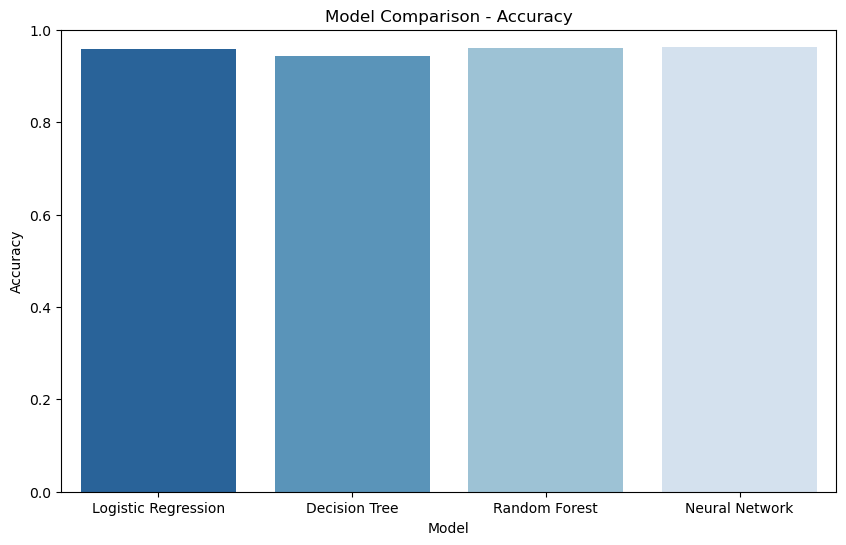

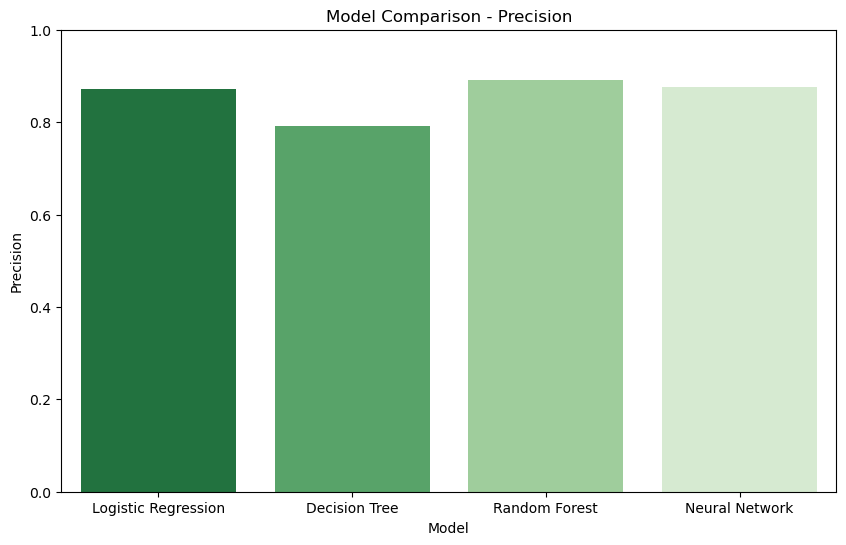

In [17]:
# Model Comparison
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Neural Network']
accuracy_scores = [lr_accuracy, dt_accuracy, rf_accuracy, nn_accuracy]
precision_scores = [lr_precision, dt_precision, rf_precision, nn_precision]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracy_scores, palette='Blues_r')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.ylim([0, 1])
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=precision_scores, palette='Greens_r')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Model Comparison - Precision')
plt.ylim([0, 1])
plt.show()